In [1]:
using Plots
using LinearAlgebra
include("../src/stochastic_gradient_descent.jl")

stochastic_gradient_descent_with_history (generic function with 1 method)

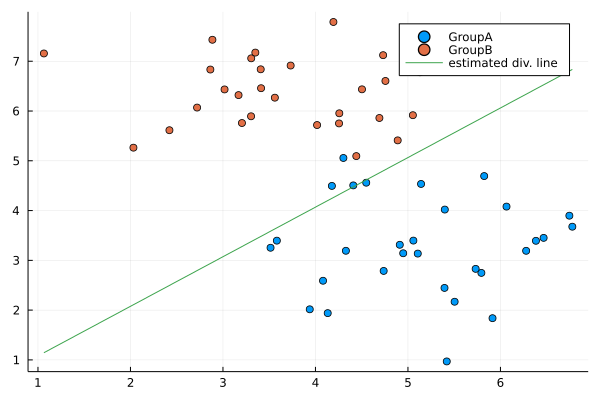

In [2]:
# データ
NA = 30
NB = 30
xA = randn(NA).+5
yA = randn(NA).+3
xB = randn(NB).+4
yB = randn(NB).+6
IndMat = ones(NA+NB,3)
for i in 1:NA;       IndMat[i,1]=xA[i]; IndMat[i,2]=yA[i]; end
for i in NA+1:NA+NB; IndMat[i,1]=xB[i-NA]; IndMat[i,2]=yB[i-NA]; end
DepVec = append!(ones(NA),zeros(NB))
# 推定
sigmoid(x) = 1 / (1+exp(-x))
calcgrad(i,w) = -(DepVec[i]-sigmoid(dot(w,IndMat[i,:]))) * IndMat[i,:]
η(t) = 0.01 / sqrt(1+t)
ϵ = 1e-4
MAX_EPOCHS = 1000
vectorabs(vector) = sum(abs.(vector))
w = stochastic_gradient_descent(calcgrad, NA+NB, zeros(3), η, ϵ, MAX_EPOCHS, vectorabs)
# 描画
scatter(xA,yA,label="GroupA")
scatter!(xB,yB,label="GroupB")
f(x) = -w[1]/w[2]*x - w[3]/w[2]
xs = [min(minimum(xA),minimum(xB)), max(maximum(xA),maximum(xB))]
plot!(xs,f,label="estimated div. line")